## **Installing the Requires Modules**

In [ ]:
!pip install pytket
!pip install pytket-qiskit
!pip install pytket-quantinuum
!pip install pylatexenc
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 807.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

## **Building the Full-adder Circuit**

In [ ]:
qcirc = QuantumCircuit(5,2)
qcirc.initialize('00000', qcirc.qubits)
qcirc.draw()

┌────────────────────────┐
q_0: ┤0                       ├
     │                        │
q_1: ┤1                       ├
     │                        │
q_2: ┤2 Initialize(0,0,0,0,0) ├
     │                        │
q_3: ┤3                       ├
     │                        │
q_4: ┤4                       ├
     └────────────────────────┘
c: 2/══════════════════════════

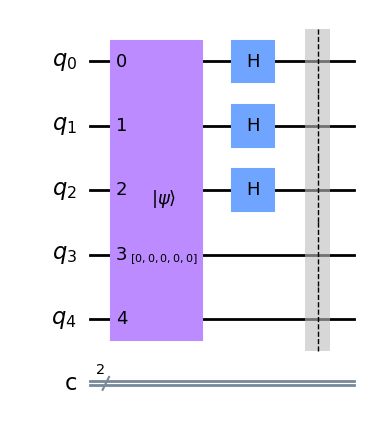

In [ ]:
qcirc.h([0])
qcirc.h([1])
qcirc.h([2])

qcirc.barrier()
qcirc.draw(output='mpl')

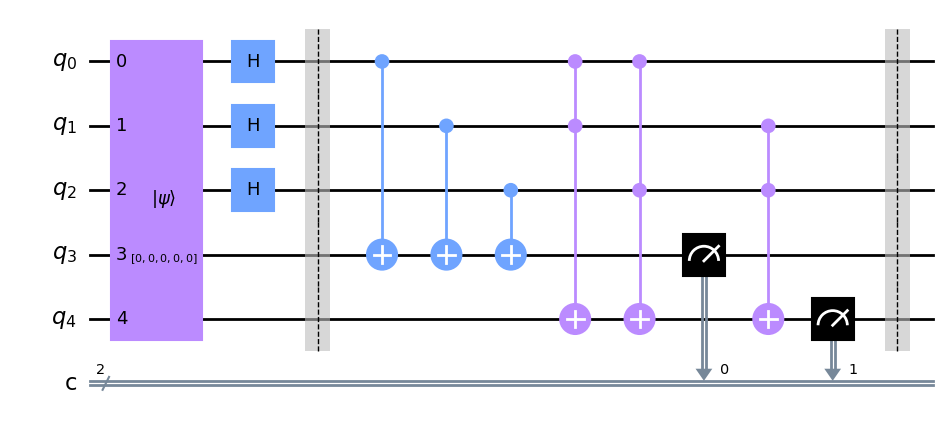

In [ ]:
qcirc.cx(0,3)
qcirc.cx(1,3)
qcirc.cx(2,3)

qcirc.ccx(0,1,4)
qcirc.ccx(0,2,4)
qcirc.ccx(1,2,4)

#qcirc.cx(3,4) # Introducing error; Introducing this error will give wrong outputs for |001>, |010>, |100>, and |111>. Output for rest of the inputs won't be effected

qcirc.measure([3,4],[0,1])
qcirc.barrier()
qcirc.draw(output='mpl')

# **Executing the Circuit & Plotting the Results**

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qcirc, backend=simulator, shots=1).result()
result_obj = result.get_counts(qcirc)
#result_obj.get('10')
print(result_obj)
#plot_histogram(result.get_counts(qcirc))

{'10': 1}


# **Creating the Grover Block**

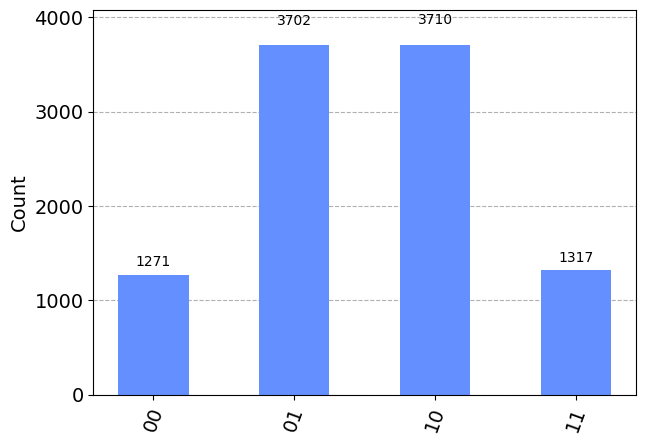

# **Rough Work**

In [ ]:
from pytket.extensions.qiskit import AerBackend
from pytket.circuit import Circuit, Qubit

# Quantum function f(x) = x + 3 modulo 10
def SUT_function(circ, qubits):
    # Add 3 to the qubit representation using modular arithmetic
    # This is a very rudimentary modular adder for the sake of demonstration


# Oracle to detect incorrect results of f(x)
def oracle(circ, qubits, auxiliary_qubit):
    # Apply the quantum function
    SUT_function(circ, qubits)

    #Mark the incorrect input output pairs in the oracle

# Grover's diffusion operator
def diffusion_operator(circ, qubits):
   #amplitude amplification of marked states

def grovers_algorithm():

    # Initialize qubits to superposition
    for q in qubits:
        circ.H(q)

    # Number of Grover iterations
    for _ in range(2):
        # Apply oracle
        oracle(circ, qubits, auxiliary_qubit)
        # Apply diffusion operator
        diffusion_operator(circ, qubits)

    # Measurement
    circ.measure_all()

    # Execute on a simulator backend
    backend = AerBackend()
    shots = 1000
    backend.compile_circuit(circ)
    result = backend.get_counts(circ, shots)
    return result.most_common()

print(grovers_algorithm())


First version with implementation of grover's oracle with sigmoid function approximation


In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from math import pi, sqrt
import matplotlib.pyplot as plt

def f_x(qc):
    # Assuming qubits 0, 1, 2 as input bits
    # qubit 3 as sum bit
    # qubit 4 as carry bit
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)

def sigmoid_approximation(qc, qubit):
    # Apply a Ry gate as a rough approximation to sigmoid
    qc.ry(pi/4, qubit)

def grovers_oracle(qc, auxiliary_qubit):
    # Apply f(x)
    f_x(qc)

    # Compute the sigmoid of the absolute difference
    # Assuming the difference has been stored in qubit 3 (sum qubit)
    sigmoid_approximation(qc, 3)

    # Phase flip based on the auxiliary qubit
    qc.z(auxiliary_qubit)

    # Uncompute f(x) to return to the original state
    f_x(qc)

def diffusion_operator(qc, input_qubits):
    # Apply the Grover's diffusion operator on the input qubits
    qc.h(input_qubits)
    qc.x(input_qubits)
    qc.h(input_qubits[-1])
    qc.mct(input_qubits[:-1], input_qubits[-1])
    qc.h(input_qubits[-1])
    qc.x(input_qubits)
    qc.h(input_qubits)

#def grovers_algorithm():
qc = QuantumCircuit(6, 5)  # 3 qubits for x, 1 for sum, 1 for carry, 1 auxiliary qubit

# Initial state preparation
qc.h([0,1,2])
qc.x(5)
qc.h(5)

# Grover's Oracle and Diffusion operator (repeated for sqrt(N) times, i.e., 2 times for 3 qubits)
for _ in range(2):
    grovers_oracle(qc, 5)
    diffusion_operator(qc, [0,1,2])

# Measurement
qc.measure([0,1,2,3,4], [0,1,2,3,4])

# Execute and plot
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=10000).result()
counts = result.get_counts(qc)
histogram = plot_histogram(counts)
print(result)
print(counts)

Second version with identification of specific patterns for incorrect states marking in grover's oracle

{'10011': 78, '11110': 251, '00101': 688, '10001': 78, '11010': 252, '01001': 87, '01110': 259, '11000': 228, '00100': 716, '00110': 712, '00001': 728, '10010': 79, '11100': 267, '10101': 84, '00011': 733, '00111': 731, '11101': 236, '10111': 250, '10100': 275, '00010': 684, '11111': 251, '11011': 222, '10000': 97, '11001': 236, '00000': 676, '10110': 229, '01101': 105, '01000': 95, '01100': 247, '01011': 95, '01111': 241, '01010': 90}


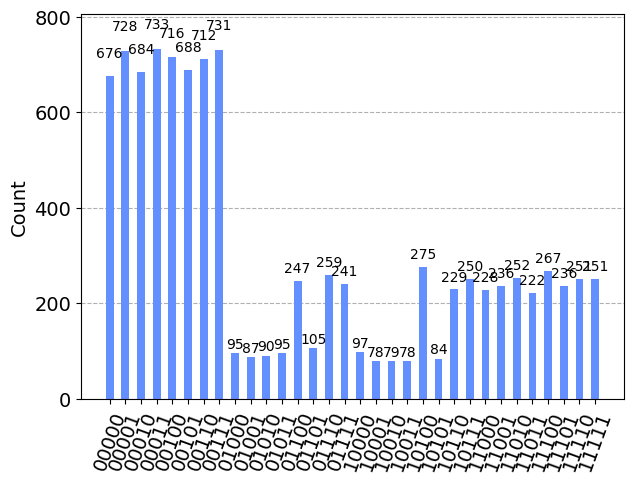

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram

def binary_addition(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)

def grover_oracle():
    qc = QuantumCircuit(6)
    binary_addition(qc)

    # For patterns |001|00>, |001|01>, |001|11>
    qc.x(0)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(0)

    # For patterns |010|00>, |010|01>, |010|11>
    qc.x(1)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(1)

    # For patterns |011|00>, |011|10>, |011|11>
    qc.x(0)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(0)

    # For patterns |100|00>, |100|01>, |100|11>
    qc.x(2)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(2)

    # For patterns |101|00>, |101|10>, |101|11>
    qc.x(0)
    qc.x(2)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(0)
    qc.x(2)

    # For patterns |110|00>, |110|10>, |110|11>
    qc.x(1)
    qc.x(2)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(1)
    qc.x(2)

    # For pattern |111|00>, |111|01>, |111|10>
    qc.x(0)
    qc.x(1)
    qc.x(2)
    qc.mct([0, 1, 2, 3], 5)
    qc.mct([0, 1, 2, 4], 5)
    qc.x(0)
    qc.x(1)
    qc.x(2)

    # Introduce a phase flip for the marked states
    qc.z(5)

    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.h(qubit)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.x(qubit)
    qc.h(nqubits-2)
    qc.mct(list(range(nqubits-2)), nqubits-2)
    qc.h(nqubits-2)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.x(qubit)
    for qubit in range(nqubits-1):  # Exclude the ancilla
        qc.h(qubit)
    return qc

n = 6
grover_circuit = QuantumCircuit(n, 5)  # 5 classical bits for the measurement
grover_circuit.h(list(range(3)))

num_iterations = 2  # Roughly sqrt(2^3) for 3 qubits, we can optimize this if needed
for _ in range(num_iterations):
    grover_circuit = grover_circuit.compose(grover_oracle())
    grover_circuit = grover_circuit.compose(diffuser(6))

grover_circuit.measure(range(5), range(5))

# Execution
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(grover_circuit, simulator)
job = simulator.run(compiled_circuit, shots=10000)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Third version with generalized marking of incorrect state patterns in Grover's oracle

{'00110': 1259, '00101': 1221, '00100': 1260, '00001': 1287, '00000': 1251, '00010': 1255, '00011': 1185, '00111': 1282}


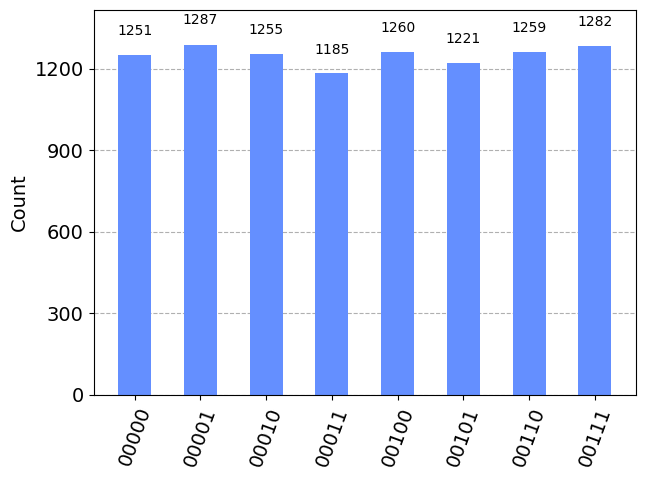

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram

def binary_addition(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)

def grover_oracle():
    qc = QuantumCircuit(6)
    binary_addition(qc)

    # Correct states based on the binary addition logic
    correct_states = ['00000', '00110', '01010', '01101', '10010', '10101', '11001', '11111']

    # All possible states for a 5-qubit system
    all_states = ['{0:05b}'.format(i) for i in range(32)]

    # Get the incorrect states by removing the correct states from all possible states
    incorrect_states = [state for state in all_states if state not in correct_states]

    # Apply phase flip for incorrect states
    for state in incorrect_states:
        qc.x([i for i in range(5) if state[i] == '1'])
        qc.z(4)  # Apply Z gate to introduce a phase flip
        qc.x([i for i in range(5) if state[i] == '1'])
    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits-1):  # Exclude the last qubit which is the carry
        qc.h(qubit)
    for qubit in range(nqubits-1):
        qc.x(qubit)
    qc.h(nqubits-2)
    qc.mct(list(range(nqubits-2)), nqubits-2)
    qc.h(nqubits-2)
    for qubit in range(nqubits-1):
        qc.x(qubit)
    for qubit in range(nqubits-1):
        qc.h(qubit)
    return qc

n = 6
grover_circuit = QuantumCircuit(n, 5)  # 5 classical bits for the measurement
grover_circuit.h(list(range(3)))

num_iterations = 2  # Roughly sqrt(2^3) for 3 qubits, we can optimize this if needed
for _ in range(num_iterations):
  grover_circuit = grover_circuit.compose(grover_oracle())
  grover_circuit = grover_circuit.compose(diffuser(6))

grover_circuit.measure(range(5), range(5))

# Execution
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(grover_circuit, simulator)
result = simulator.run(compiled_circuit, shots=10000).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)


# **Modified version of the code with explanation included and an approximation of signum function included**

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def f_x_with_error(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)
    qc.cx(3,4)  # Introducing the error

def f_x_without_error(qc):
    qc.cx(0,3)
    qc.cx(1,3)
    qc.cx(2,3)
    qc.ccx(0,1,4)
    qc.ccx(0,2,4)
    qc.ccx(1,2,4)

def grovers_oracle(qc):
    f_x_with_error(qc)  # Erroneous adder
    f_x_without_error(qc)  # Correct adder

    # Check if the results from f_x_with_error and f_x_without_error are different
    qc.cx(3, 6)
    qc.cx(4, 6)

    # Implementing phase kickback using the auxiliary qubit
    qc.cz(6,7)  # Z-gate to flip the phase

    # Undo the operations to return back
    qc.cx(4, 6)
    qc.cx(3, 6)

    f_x_without_error(qc)  # Uncompute the correct adder

def diffusion_operator(qc):
    qc.h([0,1,2])
    qc.x([0,1,2])
    qc.h(2)
    qc.mct([0,1], 2)
    qc.h(2)
    qc.x([0,1,2])
    qc.h([0,1,2])

def grovers_algorithm():
    qc = QuantumCircuit(8, 3)  # Added another auxiliary qubit

    # Initial state preparation
    qc.h([0,1,2])
    qc.x(7)
    qc.h(7)  # Prepare the auxiliary qubit in (|0⟩-|1⟩)/√2 state
    qc.barrier()

    # Grover's Oracle and Diffusion operator
    for _ in range(2):
        grovers_oracle(qc)
        qc.barrier()
        diffusion_operator(qc)
        qc.barrier()

    # Measurement
    qc.measure([0,1,2], [0,1,2])

    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend=simulator, shots=10000).result()
    print(result.get_counts(qc))

grovers_algorithm()

# **Some notes for line by line explanation of the code** -

1) def f_x_with_error(qc):
    ...
This function implements the quantum adder with the error (qc.cx(3,4)) as described.

2) def f_x_without_error(qc):
    ...
This function implements the quantum adder without the error.

3) def grovers_oracle(qc):
    ...
This function marks the solutions (states) where the erroneous adder and correct adder produce different results:

The erroneous and correct adders are applied.
Their outputs are compared. If different, qubit 6 will be set to |1⟩.
A controlled-Z gate flips the phase of our marked states using qubit 7.
The adder operations are then undone to reset the state.

4) def diffusion_operator(qc):
    ...
This function is the Grover diffusion operator. It amplifies the amplitude of the marked states, aiding in their eventual observation.

5) def grovers_algorithm():
    ...
Here's the breakdown:

An 8-qubit quantum circuit is initialized.
The first three qubits are initialized in a superposition using Hadamard gates.
Qubit 7, our Grover auxiliary qubit, is prepared in the state (|0⟩-|1⟩)/√2.
Grover's oracle and the diffusion operator are applied twice. The number of repetitions can be adjusted for better results. For this problem, two repetitions are a good estimate.
The first three qubits are measured.
The simulation is executed and the results are printed

6) For def grovers_oracle(qc):
    f_x_with_error(qc)  # Erroneous adder
    f_x_without_error(qc)  # Correct adder
    
    # Check if the results from f_x_with_error and f_x_without_error are different
    qc.cx(3, 6)
    qc.cx(4, 6)
    
    # Implementing phase kickback using the auxiliary qubit
    qc.cz(6,7)  # Z-gate to flip the phase
    
    # Undo the operations to return back
    qc.cx(4, 6)
    qc.cx(3, 6)
    
    f_x_without_error(qc)  # Uncompute the correct adder

f_x_with_error(qc)
This line applies the quantum adder function with the introduced error. After this step, the sum and carry qubits (3 & 4) will hold the results of this erroneous addition.

f_x_without_error(qc)
This line applies the correct quantum adder function, essentially again computing the sum and carry for the input, but this time correctly.

qc.cx(3, 6)
qc.cx(4, 6)
The result of the erroneous adder and the correct adder is now XOR'd using controlled-X gates. This step will set qubit 6 to |1⟩ if and only if the results from the two adder functions differ. If the results are the same, qubit 6 remains at |0⟩.

qc.cz(6,7)
This is the central part of Grover's oracle. The Z gate flips the phase of a state only if it's |1⟩. In our case, if qubit 6 is set to |1⟩ (meaning the adders produced different results), then the phase of our Grover auxiliary qubit (qubit 7, which is in the state (|0⟩-|1⟩)/√2) will get a negative sign. This is the "marking" process of the Grover's oracle.

qc.cx(4, 6)
qc.cx(3, 6)
After the phase kickback, we undo the operations used for the comparison to return qubit 6 to its initial state.

f_x_without_error(qc)
The last step is to undo (or "uncompute") the operation of the correct adder. This ensures that only the state of the Grover auxiliary qubit (qubit 7) is changed by the oracle, and no other qubits have their states altered.

The oracle's main goal is to "mark" the states where the adder functions produce different results, by flipping their phase. By the end of grovers_oracle(), any input state (combinations of qubits 0, 1, and 2) for which the adders produced different results will have its phase flipped.

7) def grovers_algorithm():
    qc = QuantumCircuit(8, 3)  # Added another auxiliary qubit
    
    # Initial state preparation
    qc.h([0,1,2])
    qc.x(7)
    qc.h(7)  # Prepare the auxiliary qubit in (|0⟩-|1⟩)/√2 state
    qc.barrier()
    
    # Grover's Oracle and Diffusion operator
    for _ in range(2):
        grovers_oracle(qc)
        qc.barrier()
        diffusion_operator(qc)
        qc.barrier()
    
    # Measurement
    qc.measure([0,1,2], [0,1,2])
    
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend=simulator, shots=10000).result()
    plot_histogram(result.get_counts(qc)).show()
    print(result.get_counts(qc))

grovers_algorithm()

qc = QuantumCircuit(8, 3)
We initialize a quantum circuit with 8 qubits and 3 classical bits. Qubits 0 to 2 are the input qubits. Qubits 3 and 4 store the sum and carry of the adder, respectively. Qubit 6 is for checking the difference in results from the adder with and without error. Qubit 7 is the Grover auxiliary qubit.

qc.h([0,1,2])
qc.x(7)
qc.h(7)
The input qubits (0 to 2) are initialized in a superposition of all possible states using the Hadamard gates. The auxiliary qubit (7) is prepared in the state  , which is required for the phase kickback in Grover's oracle.

for _ in range(2):
    grovers_oracle(qc)
    qc.barrier()
    diffusion_operator(qc)
    qc.barrier()
The core of Grover's algorithm consists of repeated applications of the oracle (to mark the desired states) followed by the diffusion operator (to amplify the probabilities of the marked states). In the provided implementation, this is repeated twice.

The oracle marks the states where the adders produce different results by flipping their phase.
The diffusion operator amplifies the amplitude of the marked states, making them more probable to be measured, while suppressing the amplitude of the unmarked states

qc.measure([0,1,2], [0,1,2])
After the Grover iterations, the algorithm measures qubits 0 to 2, which are the input qubits. The goal is to observe the states (bit patterns) that most often lead to different results in the adder functions with and without errors.

Last part is simulation and result printing.